In [9]:
using LinearAlgebra, PyPlot

In [24]:
function getRotMat(ang_rad, ax)
#     input: ang_rad (angle in radian)
#     ax: 1: roll  (rot in x-axis)
#         2: pitch (rot in y-axis)
#         3: yaw   (rot in z-axis)
    id = [0,1,2].+ax
    id[id.>3] .= id[id.>3] .- 3;
    M = zeros(3,3)
    M[id[1],id[1]] = 1;
    M[id[2],id[2]] = cos(ang_rad);
    M[id[2],id[3]] = sin(ang_rad);
    M[id[3],id[3]] = M[id[2],id[2]];
    M[id[3],id[2]] = -M[id[2],id[3]];
    M
end
function getRotMat_3D(ang_rad)
#     input:  ang_rad (angle in radian) - roll, pitch, yaw    
#     output: rot(pitch)-rot(roll)-rot(yaw)
    M1 = getRotMat(ang_rad[1],1)
    M2 = getRotMat(ang_rad[2],2)
    M3 = getRotMat(ang_rad[3],3)
    M = M3*M1*M2
end
function getCoilPosBase(r)
#     input:  r: radius
#     output: p: coil position in one circle
    dth = 0:1:360
    p = zeros(length(dth),3)
    p[:,1] .= 0
    p[:,2] .= r.*cosd.(dth)
    p[:,3] .= r.*sind.(dth);
    p
end
function rotCoil(p, ang_rad)
#     input:  p: coil position in one circle
#             ang_rad (angle in radian) - roll, pitch, yaw    
#     output: rotated positions
    M = getRotMat_3D(ang_rad);
    (M*p')';
end
function transCoil(p, dp);
#     input:  p: coil position 
#             p0:moved
#     output: rotated positions
    p[:,1] = p[:,1] .+ dp[1]
    p[:,2] = p[:,2] .+ dp[2]
    p[:,3] = p[:,3] .+ dp[3]
    p
end
function getCoilPos(p0, r, rot_rad)
#     input:  p0: Coil center position [x,y,z]
#             r : coil radius
#             rot_rad - roll, pitch, yaw (angle in radian)
#     output: rotated positions
    M = getRotMat_3D(rot_rad);
    p_base = getCoilPosBase(r)
    p_rot = rotCoil(p_base, rot_rad);
    p_tr = transCoil(p_rot, p0);
    p_tr
end


getCoilPos (generic function with 1 method)

-------------------------

# Biot-Savart Law
<img src="BiotSavartLaw_Diagram.png" alt="Markdown Monster icon" width = "200" >
$$ d\overrightarrow { B } =\frac { \mu _{ o } }{ 4\pi  } \frac { Id\overrightarrow { s } \times \overrightarrow { r }  }{ r^{ 2 } } $$ 

In [29]:
μ0 = 4π * 1e-7 # Tm/A;
I = 1.0 # A;

In [82]:
input = [130, 11.48, 84.1167]
input = [210, 14.35, 146.04]
input = [290, 17.22, 196.48]
input = [370, 19.04, 244.76]
t = input[2]
t_unit = 0.57
r = (input[1]/2 + t/2)
n = t./t_unit
d = input[3]-t
[d, r, n]

3-element Array{Float64,1}:
 225.72            
 194.52            
  33.40350877192983

In [146]:
d = [72.6375, 117.338, 162.038, 206.682]./2
r = [65, 105, 145, 185]
n = [20, 25, 30, 34]
_d = zeros(3,3); _d[1,3] = d[1]; _d[2,2] = d[2];  _d[3,1] = d[3]; 
coilθ = zeros(3,3); coilθ[1,2] = π/2; coilθ[2,3] = π/2;  coilθ[1,1] = 0; 
p1 = [getCoilPos( _d[i,:], r[i], coilθ[i,:]) for i = 1:3]
p2 = [getCoilPos(-_d[i,:], r[i], coilθ[i,:]) for i = 1:3]
p = vcat(p1,p2);

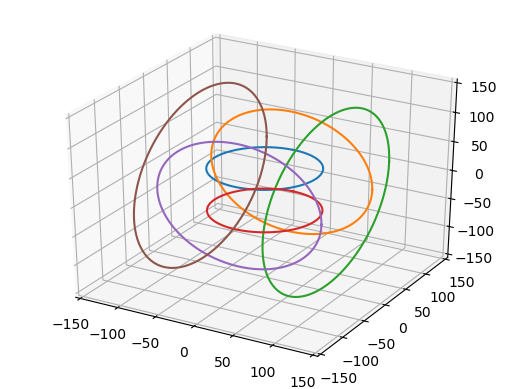

In [147]:
for i = 1:length(p)
    plot3D(p[i][:,1], p[i][:,2], p[i][:,3]); 
end
limit = 150
xlim(-limit,limit); ylim(-limit,limit); zlim(-limit,limit);

Given ==> d, r, nx, ny, t, rot_rad

coordinate => i-th coil, j-th/k-th wire

In [141]:
# fixed 
w = 0.57 # AWG 23

0.57

In [170]:
r = 100
d = [100,0,0]
n = 20;
t = (n-1)*w
ds = r*dth

i = 20
j = 20
_r = r + (j*w - t/2)
_d = d + 

_r, _d

(105.985, [105.985, 0.0, 0.0])

In [172]:
d = [72.6375, 117.338, 162.038, 206.682]./2
r = [65, 105, 145, 185]
n = [20, 25, 30, 34]
_d = zeros(3,3); _d[1,3] = d[1]; _d[2,2] = d[2];  _d[3,1] = d[3]; 
coilθ = zeros(3,3); coilθ[1,2] = π/2; coilθ[2,3] = π/2;  coilθ[1,1] = 0; 

In [173]:
_d

3×3 Array{Float64,2}:
  0.0     0.0    36.3188
  0.0    58.669   0.0   
 81.019   0.0     0.0   

In [43]:
_d = zeros(3,3); _d[1,3] = d[1]; _d[2,2] = d[2];  _d[3,1] = d[3]; 

i = 1;
j = 1;
k = 1;
getCoilPos( _d[i,:] + [j*w-  t/2, 0, 0], r[i] + (k*w - t/2), coilθ[i,:])

5-element Array{Float64,1}:
 -0.8549999999999999 
 -0.2849999999999999 
  0.28500000000000014
  0.855              
  1.4249999999999998 

In [38]:
i = 1;
M = getRotMat_3D(rot_rad);
p_base = getCoilPosBase(r)
# p_rot = rotCoil(p_base, rot_rad);
# p_tr = transCoil(p_rot, p0);

In [ ]:
function getCoilPos_n(p0, r, rot_rad, nx, ny, t)
#     input:  p0: Coil center position [x,y,z]
#             r : coil radius
#             rot_rad - roll, pitch, yaw (angle in radian)
#             nx - number of turns in x (-nx/2, nx/2)
#             ny - number of turns in y (-ny/2, ny/2)
#             t - tickness of wire (AWG = 0.57mm)
#             rot_rad - roll, pitch, yaw (angle in radian)
#             rot_rad - roll, pitch, yaw (angle in radian)
#     output: rotated positions
    M = getRotMat_3D(rot_rad);
    p_base = getCoilPosBase(r)
    p_rot = rotCoil(p_base, rot_rad);
    p_tr = transCoil(p_rot, p0);
    p_tr
end